# Homework #2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sm
from PIL import Image
sns.set(style='ticks', palette='Set2')

## Question 1

A stochastic Lotka-Volterra (predator-prey) model is given by the following equations for the abundance of two species, $Y_1$ and $Y_2$, \begin{equation*} Y_1 \xrightarrow{c_1} 2Y_1\end{equation*} \begin{equation*} Y_1 + Y_2 \xrightarrow{c_2} 2Y_2\end{equation*} \begin{equation*} Y_2 \xrightarrow{c_3} \varnothing \end{equation*}

- Explain why this is called a predator-prey model. What is the corresponding ODE
model? Given this interpretation, explain whether species 1 or species 2 can exist in
isolation, i.e. in the absence of the other species.

### Answer

Consider the ODEs to the predator-prey model:

$$
\begin{align*} 
\frac{dY_1}{dt} &= c_1Y_1 - c_2Y_1Y_2\\
\frac{dY_2}{dt} &= c_2Y_1Y_2 - c_3Y_2 
\end{align*}
$$

Using these equations, we can observe that the predator, $Y_2$, and the prey, $Y_1$, are dependent on each other for their reproduction and death respectively. More specifically, we can observe that the death of $Y_1$ is dependent on the frequency of $Y_2$ (predator $Y_2$ eats prey $Y_1$). In a similar fashion, we can see that the birth rate of $Y_2$ is dependent on the frequency of $Y_1$, because the prey provides nourishment to the predator and results in more predators after reproduction. The prey can exist in isolation from the predator, because intraspecific competition is not considered in this model. The predator is the only factor removing prey from the system. In the absence of the predator, the prey population will increase exponentially. This is not the case for the predator, as its birth rate is dependent on the presence of prey. If there are no prey, the predator population declines exponentially until extinct.

- Use the Gillespie algorithm to simulate trajectories from the model. Use $c_1 = 1, c_2 = 0.005, c_3 = 0.6$.


### Answer

In [7]:
def lotka_volterra(Y_1, Y_2, c_1, c_2, c_3, max_time):
    
    time_counts = []
    Y_1_counts = []
    Y_2_counts = []
    current_time = 0
    
    while current_time < max_time:
        
        prey_birth = c_1 * Y_1
        prey_death = c_2 * Y_1 * Y_2
        predator_birth = c_2 * Y_1 * Y_2
        predator_death = c_3 * Y_2
        
        cum_sum_rates = np.cumsum([prey_birth, prey_death, predator_birth, predator_death])
        current_time += -np.log(np.random.rand()) / cum_sum_rates[-1]
        rand_prob = np.random.rand() * cum_sum_rates[-1]
        
        if rand_prob <= cum_sum_rates[0]:
            Y_1 += 1
        elif rand_prob <= cum_sum_rates[1]:
            Y_1 -= 1
        elif rand_prob <= cum_sum_rates[2]:
            Y_2 += 1
        else:
            Y_2 -= 1
            
            
            
        Y_1_counts.append(Y_1)
        Y_2_counts.append(Y_2)
        time_counts.append(current_time)
        
        if Y_1 == 0 or Y_2 == 0:
            break
    
    return time_counts, Y_1_counts, Y_2_counts

In [10]:
Y_1 = 100
Y_2 = 100
c_1 = 1
c_2 = 0.005
c_3 = 0.6
max_time = 100
time_counts, Y_1_counts, Y_2_counts = lotka_volterra(Y_1, Y_2, c_1, c_2, c_3, max_time)

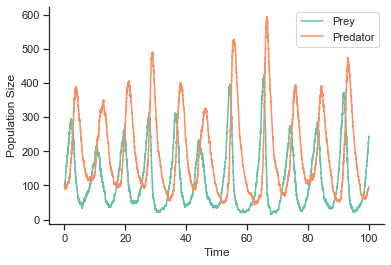

In [11]:
plt.plot(time_counts, Y_1_counts, label='Prey')
plt.plot(time_counts, Y_2_counts, label='Predator')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
sns.despine()

- Changing which parameter will make it more likely for species 1 to go extinct? What
about species 2? Change these parameters gradually to verify your hypothesis in simulations.

## Answer

Increasing the birth rate of predators/consumption of prey, $c_2$, results in the more likely extinction of prey. Decreasing the birth rate of prey, $c_1$, results in the more likely extinction of predators. Increasing $c_3$ results in the more likely extinction of predators. Decreasing $c_3$ results in the more likely extinction of prey.  However, the effect of changes in $c_3$ is smaller than the other two variables. This can be seen by calculating the extinction probabilities of both the prey and predator under different values of $c_1$, $c_2$, or $c_3$:

In [2]:
def lotka_volterra_extinction(Y_1, Y_2, c_1, c_2, c_3, max_time, index):
    
    current_time = 0
    
    while current_time < max_time:
        
        prey_birth = c_1 * Y_1
        prey_death = c_2 * Y_1 * Y_2
        predator_birth = c_2 * Y_1 * Y_2
        predator_death = c_3 * Y_2
        
        cum_sum_rates = np.cumsum([prey_birth, prey_death, predator_birth, predator_death])
        current_time += -np.log(np.random.rand()) / cum_sum_rates[-1]
        rand_prob = np.random.rand() * cum_sum_rates[-1]
        
        if rand_prob <= cum_sum_rates[0]:
            Y_1 += 1
        elif rand_prob <= cum_sum_rates[1]:
            Y_1 -= 1
        elif rand_prob <= cum_sum_rates[2]:
            Y_2 += 1
        else:
            Y_2 -= 1
            
        
        if Y_1 == 0 or Y_2 == 0:
            break
            
    return Y_1 == 0, Y_2 == 0

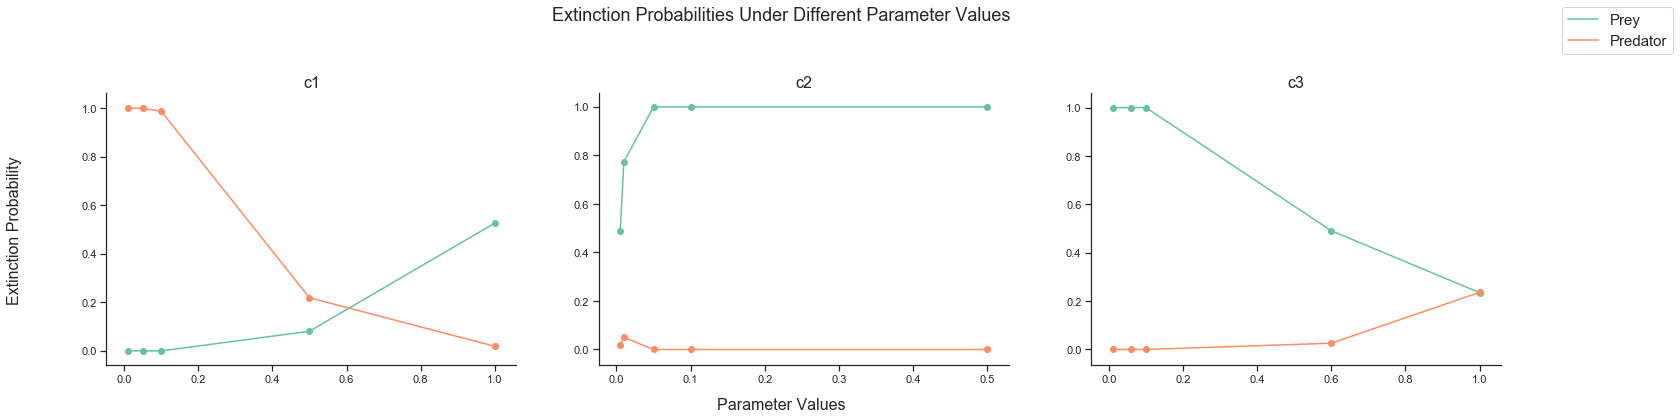

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))
fig.suptitle('Extinction Probabilities Under Different Parameter Values', fontsize=18, y=1.12)
fig.text(0.5, 0.0, 'Parameter Values', ha='center', fontsize=16)
fig.text(0.07, 0.5, 'Extinction Probability', va='center', rotation='vertical', fontsize=16)

Y_1 = 100
Y_2 = 100
c_2 = 0.005
c_3 = 0.6
max_time = 100
num_sims = 1000
c_1_values = [0.01, 0.05, 0.1, 0.5, 1]

probs_Y_1 = []
probs_Y_2 = []

for i in range(len(c_1_values)):
    simulations = [lotka_volterra_extinction(Y_1, Y_2, c_1_values[i], 
                                             c_2, c_3, 
                                             max_time, j) for j in range(num_sims)]
    Y_1_extinctions, Y_2_extinctions = zip(*simulations)
    Y_1_extinctions = np.asarray(Y_1_extinctions)
    Y_2_extinctions = np.asarray(Y_2_extinctions)
    
    probs_Y_1.append(np.sum(Y_1_extinctions)/num_sims)
    probs_Y_2.append(np.sum(Y_2_extinctions)/num_sims)
    

ax[0].plot(c_1_values, probs_Y_1, label='Prey')
ax[0].scatter(c_1_values, probs_Y_1)
ax[0].plot(c_1_values, probs_Y_2, label='Predator')
ax[0].scatter(c_1_values, probs_Y_2)
ax[0].set_title('c1', fontsize=16)
sns.despine()

Y_1 = 100
Y_2 = 100
c_1 = 1
c_3 = 0.6
max_time = 100
num_sims = 1000
c_2_values = [0.005, 0.01, 0.05, 0.1, 0.5]

c_2_probs_Y_1 = []
c_2_probs_Y_2 = []

for i in range(len(c_2_values)):
    simulations = [lotka_volterra_extinction(Y_1, Y_2, c_1, 
                                             c_2_values[i], c_3, 
                                             max_time, j) for j in range(num_sims)]
    Y_1_extinctions, Y_2_extinctions = zip(*simulations)
    Y_1_extinctions = np.asarray(Y_1_extinctions)
    Y_2_extinctions = np.asarray(Y_2_extinctions)
    
    c_2_probs_Y_1.append(np.sum(Y_1_extinctions)/num_sims)
    c_2_probs_Y_2.append(np.sum(Y_2_extinctions)/num_sims)
    

ax[1].plot(c_2_values, c_2_probs_Y_1, label='Prey')
ax[1].scatter(c_2_values, c_2_probs_Y_1)
ax[1].plot(c_2_values, c_2_probs_Y_2, label='Predator')
ax[1].scatter(c_2_values, c_2_probs_Y_2)
ax[1].set_title('c2', fontsize=16)
sns.despine()

Y_1 = 100
Y_2 = 100
c_1 = 1
c_2 = 0.005
max_time = 100
max_time = 100
num_sims = 1000
c_3_values = [0.01, 0.06, 0.1, 0.6, 1]

probs_Y_1 = []
probs_Y_2 = []

for i in range(len(c_3_values)):
    simulations = [lotka_volterra_extinction(Y_1, Y_2, c_1, 
                                             c_2, c_3_values[i], 
                                             max_time, j) for j in range(num_sims)]
    Y_1_extinctions, Y_2_extinctions = zip(*simulations)
    Y_1_extinctions = np.asarray(Y_1_extinctions)
    Y_2_extinctions = np.asarray(Y_2_extinctions)
    
    probs_Y_1.append(np.sum(Y_1_extinctions)/num_sims)
    probs_Y_2.append(np.sum(Y_2_extinctions)/num_sims)
    

ax[2].plot(c_3_values, probs_Y_1, label='Prey')
ax[2].scatter(c_3_values, probs_Y_1)
ax[2].plot(c_3_values, probs_Y_2, label='Predator')
ax[2].scatter(c_3_values, probs_Y_2)
ax[2].set_title('c3', fontsize=16)
sns.despine()

fig.legend(["Prey", "Predator"], prop={'size': 15})

## Question 2

Consider the following chemical reaction \begin{equation*} A \xrightarrow{k} X  \xrightarrow{\alpha_1} \varnothing \end{equation*} \begin{equation*} B \xrightarrow{k} Y \xrightarrow{\alpha_2} \varnothing \end{equation*} \begin{equation*} X + Y \xrightarrow{k_a} C \end{equation*}

The deterministic set of equations describing this reaction has the form 

$$
\begin{align*} 
\frac{d[X]}{dt} &= k - \alpha_1[X] - k_a[X][Y] \\
\frac{d[Y]}{dt} &= k - \alpha_2[Y] - k_a[X][Y]
\end{align*}
$$

Where [ $\cdot$ ] denotes concentration.

- Find the fixed points of the deterministic system. Show that for the values 
$$
\begin{align*} 
k = 10 \hspace{1cm} \alpha_1 = 10^{-6} \hspace{1cm} \alpha_2 = 10^{-5} \hspace{1cm} k_a = 10^{-5} \\
k = 10^{3} \hspace{1cm} \alpha_1 = 10^{-4} \hspace{1cm} \alpha_2 = 10^{-3} \hspace{1cm} k_a = 10^{-3}
\end{align*}
$$ 
the fixed points are the same.

### Answer

Solving the equations (for each parameter set) using python:

In [126]:
k = 10
alpha_1 = 10**-6
alpha_2 = 10**-5
ka = 10**-5

x, y = sm.symbols('x, y', negative=False)
X = k - alpha_1 * x - ka * x * y
Y = k - alpha_2 * y - ka * x * y
XEqual = sm.Eq(X, 0)
YEqual = sm.Eq(Y, 0)
equilibria = sm.solve( (XEqual, YEqual), x, y, set=True)
print(equilibria)

([x, y], {(3161.77769969685, 316.177769969685)})


In [127]:
k = 10**3
alpha_1 = 10**-4
alpha_2 = 10**-3
ka = 10**-3

x, y = sm.symbols('x, y', negative=False)
X = k - alpha_1 * x - ka * x * y
Y = k - alpha_2 * y - ka * x * y
XEqual = sm.Eq(X, 0)
YEqual = sm.Eq(Y, 0)
equilibria = sm.solve( (XEqual, YEqual), x, y, set=True)
print(equilibria)

([x, y], {(3161.77769969685, 316.177769969685)})


We observe that the fixed points, $\dot{X} = 3161.77769969685$ and $\dot{Y} = 316.177769969685$ are the same for both parameter sets.

- Run the Gillespie algorithm and show that the behavior is very different in the two
cases. Compute the stationary distributions in the two cases.

### Answer

In [3]:
def chem_reaction_tau(X, Y, k, alpha_1, alpha_2, ka, max_time, tau):
    
    time_counts = []
    X_counts = []
    Y_counts = []
    current_time = 0
    
    while current_time < max_time:
        
        k_reaction = np.random.poisson(k * tau)
        alpha_1_reaction = np.random.poisson(alpha_1 * X * tau)
        alpha_2_reaction = np.random.poisson(alpha_2 * Y * tau)
        ka_reaction = np.random.poisson(ka * X * Y * tau)
        
        X += (k_reaction - alpha_1_reaction - ka_reaction)
        Y += (k_reaction - alpha_2_reaction - ka_reaction)
        
        
        current_time += tau
        
        
        X_counts.append(X)
        Y_counts.append(Y)
        time_counts.append(current_time)
    
    return time_counts, X_counts, Y_counts

In [71]:
k = 10
alpha_1 = 10**-6
alpha_2 = 10**-5
ka = 10**-5
X = 3000
Y = 300
max_time = 10000
tau = 0.05
num_sims = 1000
simulations = [chem_reaction_tau(X, Y, k, alpha_1, alpha_2, ka, max_time, tau) 
               for i in range(num_sims)]
time_counts, X_counts, Y_counts = zip(*simulations)
time_counts = np.asarray(time_counts)
X_counts = np.asarray(X_counts)
Y_counts = np.asarray(Y_counts)

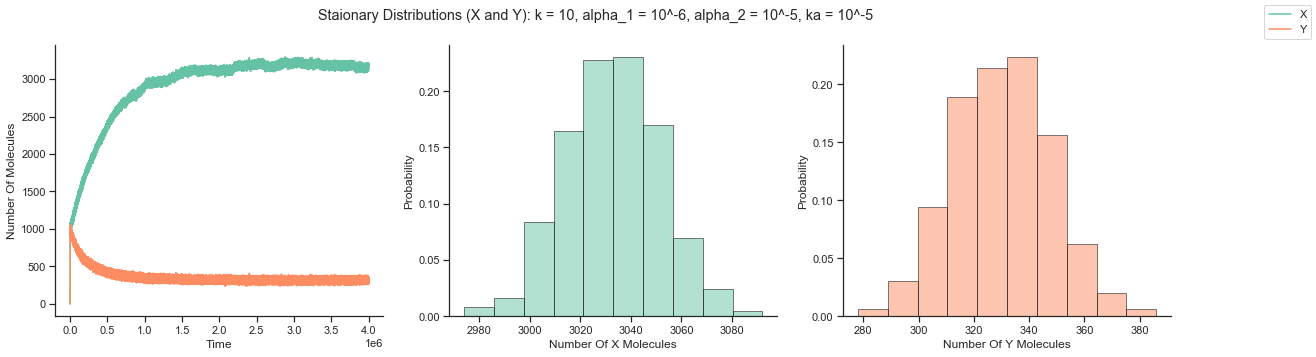

In [72]:
X = 0
Y = 0
time_points, X_points, Y_points = chem_reaction_tau(X, Y, k, alpha_1, alpha_2, ka, 4000000, tau)
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(time_points, X_points, label='X')
ax[0].plot(time_points, Y_points, label='Y')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number Of Molecules')
ax[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
eq_X_counts = [item[-1] for item in X_counts]
ax[1].hist(eq_X_counts, alpha=0.5, histtype = 'bar', fill=True, ec='black', weights=np.ones_like(eq_X_counts) / len(eq_X_counts))
ax[1].set_xlabel('Number Of X Molecules')
ax[1].set_ylabel('Probability')
eq_Y_counts = [item[-1] for item in Y_counts]
ax[2].hist(eq_Y_counts, alpha=0.5, histtype = 'bar', fill=True, ec='black',
           weights=np.ones_like(eq_Y_counts) / len(eq_Y_counts), color='#fc8d62')
ax[2].set_xlabel('Number Of Y Molecules')
ax[2].set_ylabel('Probability')
fig.legend()
fig.suptitle('Staionary Distributions (X and Y): k = 10, alpha_1 = 10^-6, alpha_2 = 10^-5, ka = 10^-5')
sns.despine()

In [4]:
k = 10**3
alpha_1 = 10**-4
alpha_2 = 10**-3
ka = 10**-3
X = 3000
Y = 300
max_time = 10000
tau = 0.05
num_sims = 1000
simulations = [chem_reaction_tau(X, Y, k, alpha_1, alpha_2, ka, max_time, tau) 
               for i in range(num_sims)]
time_counts, X_counts, Y_counts = zip(*simulations)
time_counts = np.asarray(time_counts)
X_counts = np.asarray(X_counts)
Y_counts = np.asarray(Y_counts)

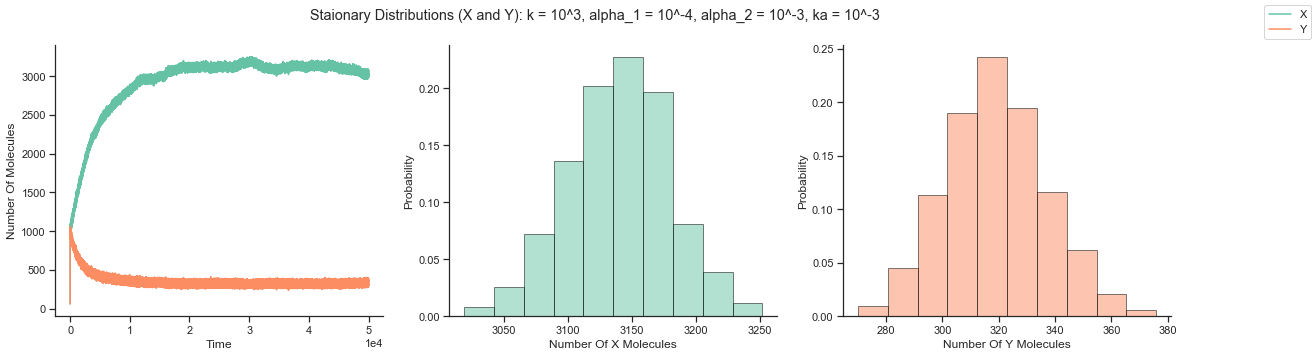

In [5]:
X = 0
Y = 0
time_points, X_points, Y_points = chem_reaction_tau(X, Y, k, alpha_1, alpha_2, ka, 50000, tau)
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(time_points, X_points, label='X')
ax[0].plot(time_points, Y_points, label='Y')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number Of Molecules')
ax[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
eq_X_counts = [item[-1] for item in X_counts]
ax[1].hist(eq_X_counts, alpha=0.5, histtype = 'bar', fill=True, ec='black', weights=np.ones_like(eq_X_counts) / len(eq_X_counts))
ax[1].set_xlabel('Number Of X Molecules')
ax[1].set_ylabel('Probability')
eq_Y_counts = [item[-1] for item in Y_counts]
ax[2].hist(eq_Y_counts, alpha=0.5, histtype = 'bar', fill=True, ec='black',
           weights=np.ones_like(eq_Y_counts) / len(eq_Y_counts), color='#fc8d62')
ax[2].set_xlabel('Number Of Y Molecules')
ax[2].set_ylabel('Probability')
fig.legend()
fig.suptitle('Staionary Distributions (X and Y): k = 10^3, alpha_1 = 10^-4, alpha_2 = 10^-3, ka = 10^-3')
sns.despine()

- Can you give an argument why the behavior in the two cases is so different?

### Answer

In the second set of parameters, the reaction rates are two orders of magnitude faster compared to the rates from the first parameter set. This results in the system reaching equilibrium more quickly in the second case. 

## Question 3

Consider a gene whose product regulates its own transcription (autoregulation). The deterministic set of equations describing mRNA ($r$) and protein ($p$) expression level are given
by:

$$
\begin{align*} 
\frac{dr}{dt} &= k_l + \phi(p) - \gamma_rr \\
\frac{dp}{dt} &= rk_p - \gamma_pp
\end{align*}
$$

where $\phi(p)$ is a function that describes how the rate of mRNA transcription depends on the protein concentration $p$.

- Write down the transition matrix for the Markov process describing this system

### Answer

Consider the following markov chain:

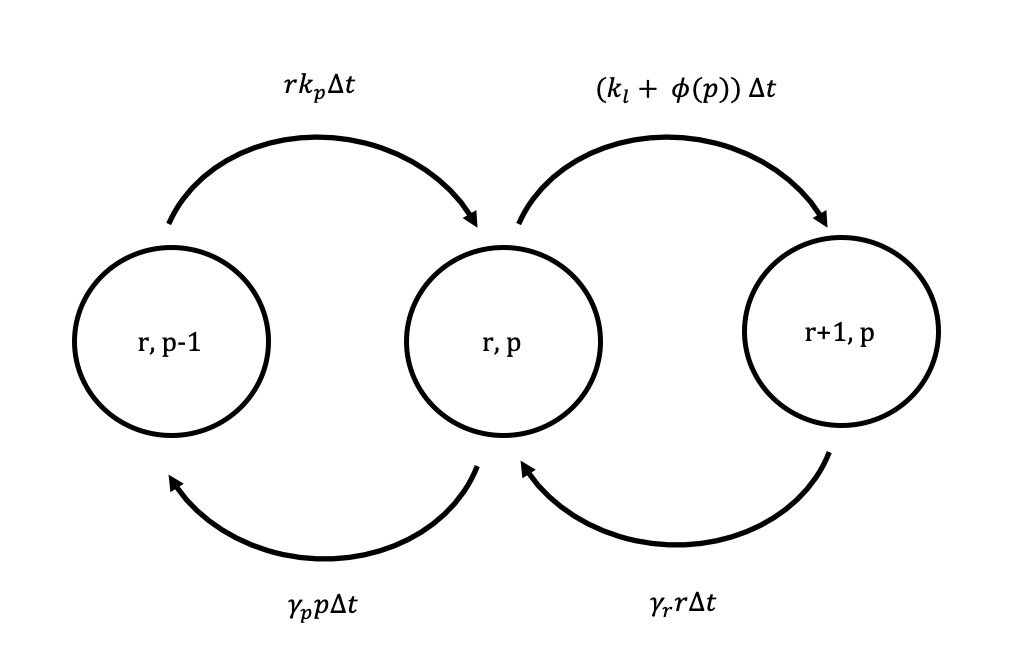

In [3]:
image = Image.open('markov_chain.png')
image

The transition matrix $T$ for this markov chain is: 

\begin{equation*} T =  \begin{pmatrix} 1-rk_p\Delta t & rk_p\Delta t & 0 \\ \gamma_p p\Delta t & 1 - (k_l + \phi(p) + \gamma_p p)\Delta t & (k_l + \phi(p)) \Delta t\\ 0 & \gamma_r r \Delta t & 1 - \gamma_r r \Delta t\end{pmatrix} \end{equation*} 

- Consider the case of positive autoregulation:

$$
\begin{align*} 
\phi(p) &= \frac{k_0(\frac{p}{K})^n}{1 + (\frac{p}{K})^n}
\end{align*}
$$

Setting $k_l = 0$, $\gamma_p = \gamma_r = k_p = k_0 = 1$ and $K = 0.5$ in Eq. 1 above, determine the number of fixed points for $n = 1$ and $n= 10$. Determine the stability of the fixed points. [HINT: This question can be addressed numerically if you wish]

### Answer

For $n = 1$:

In [12]:
kl = 0
gamma_p = 1
gamma_r = 1
kp = 1
k0 = 1
K = 0.5
n = 1

r, p = sm.symbols('r, p')
R = kl + ((k0 * (p/K)**n) / (1 + (p/K)**n)) - gamma_r * r
P = r * kp - gamma_p * p
REqual = sm.Eq(R, 0)
PEqual = sm.Eq(P, 0)
equilibria = sm.solve((REqual, PEqual), r, p, set=True)
for i,item in enumerate(equilibria[1]):
    print('Fixed point {0} is ({1:.1f}, {2:.1f})'
          .format(i, item[0], item[1]))

Fixed point 0 is (0.5, 0.5)
Fixed point 1 is (0.0, 0.0)


In [13]:
eqMat = sm.Matrix([R, P])
Mat = sm.Matrix([r, p])
jacMat = eqMat.jacobian(Mat)
print('Jacobian %s' % jacMat)
print('-------------------------------------------')

for item in equilibria[1]:
    eqmat = jacMat.subs([(r, item[0]), (p, item[1])])
    eigenval_list = list(eqmat.eigenvals())
    print('The eigenvalues for the fixed point ({0:.1f}, {1:.1f}) are {2} and {3}:'
          .format(item[0], item[1], eigenval_list[0], eigenval_list[1]))
    if eigenval_list[0] < 0.0 and eigenval_list[1] < 0.0:
        print('The fixed point ({0:.1f}, {1:.1f}) is stable.'.format(item[0], item[1]))
    else:
        print('The fixed point ({0:.1f}, {1:.1f}) is unstable.'.format(item[0], item[1]))
    print('-------------------------------------------')
    

Jacobian Matrix([[-1, -1.0*p/(p + 0.5)**2 + 2.0/(2.0*p + 1)], [1, -1]])
-------------------------------------------
The eigenvalues for the fixed point (0.5, 0.5) are -1 - sqrt(2)/2 and -1 + sqrt(2)/2:
The fixed point (0.5, 0.5) is stable.
-------------------------------------------
The eigenvalues for the fixed point (0.0, 0.0) are -sqrt(2) - 1 and -1 + sqrt(2):
The fixed point (0.0, 0.0) is unstable.
-------------------------------------------


For $n = 10$:

In [16]:
kl = 0
gamma_p = 1
gamma_r = 1
kp = 1
k0 = 1
K = 0.5
n = 10

r, p = sm.symbols('r, p')
R = kl + ((k0 * (p/K)**n) / (1 + (p/K)**n)) - gamma_r * r
P = r * kp - gamma_p * p
REqual = sm.Eq(R, 0)
PEqual = sm.Eq(P, 0)
equilibria = sm.solve((REqual, PEqual), r, p, set=True)
for i,item in enumerate(equilibria[1]):
    print('Fixed point {0} is ({1:.1f}, {2:.1f})'
          .format(i, item[0], item[1]))

Fixed point 0 is (0.5, 0.5)
Fixed point 1 is (0.0, 0.0)


In [17]:
eqMat = sm.Matrix([R, P])
Mat = sm.Matrix([r, p])
jacMat = eqMat.jacobian(Mat)
print('Jacobian %s' % jacMat)
print('-------------------------------------------')

for item in equilibria[1]:
    eqmat = jacMat.subs([(r, item[0]), (p, item[1])])
    eigenval_list = list(eqmat.eigenvals())
    if len(eigenval_list) == 1:
        print('The eigenvalue for the fixed point ({0:.1f}, {1:.1f}) is {2}:'
              .format(item[0], item[1], eigenval_list[0]))
        if eigenval_list[0] < 0.0:
            print('The fixed point ({0:.1f}, {1:.1f}) is stable.'.format(item[0], item[1]))
        else:
            print('The fixed point ({0:.1f}, {1:.1f}) is unstable.'.format(item[0], item[1]))
        print('-------------------------------------------')
    else:
        print('The eigenvalues for the fixed point ({0:.1f}, {1:.1f}) are {2} and {3}:'
              .format(item[0], item[1], eigenval_list[0], eigenval_list[1]))
        if eigenval_list[0] < 0.0 and eigenval_list[1] < 0.0:
            print('The fixed point ({0:.1f}, {1:.1f}) is stable.'.format(item[0], item[1]))
        else:
            print('The fixed point ({0:.1f}, {1:.1f}) is unstable.'.format(item[0], item[1]))
        print('-------------------------------------------')

Jacobian Matrix([[-1, -10.0*p**19/(p**10 + 0.0009765625)**2 + 10240.0*p**9/(1024.0*p**10 + 1)], [1, -1]])
-------------------------------------------
The eigenvalues for the fixed point (0.5, 0.5) are -sqrt(5) - 1 and -1 + sqrt(5):
The fixed point (0.5, 0.5) is unstable.
-------------------------------------------
The eigenvalue for the fixed point (0.0, 0.0) is -1:
The fixed point (0.0, 0.0) is stable.
-------------------------------------------


- Consider the case of negative autoregulation:

$$
\begin{align*} 
\phi(p) &= \frac{k_0}{1 + (\frac{p}{K})^n}
\end{align*}
$$

Use the Gillespie algorithm to find and plot the stationary distribution of protein for
the stochastic process you wrote down above. Use transition rates $k_l = 0.001 s^{-1}$, $k_p = 0.17s^{-1}$, $k_0 = 0.01s^{-1}$ and $\gamma_p = 0.00028s^{-1}$, $\gamma_r = 0.0083s^{-1}$ with $n  = 10$. Do this for the case of (i) strong regulation, $K = 100$ and (ii) weak regulation, $K = 10000$. Calculate the ratio of the standard deviation to the mean of the distribution
for both cases.

### Answer

In [20]:
def autoregulation(k_l, k_p, k_0, gamma_p, gamma_r, n, K, R, P, max_steps):
    
    time_counts = []
    R_counts = []
    P_counts = []
    current_time = 0
    current_step = 0
    
    while current_step < max_steps:
        kl_rate = k_l + (k_0 / (1 + (P/K)**n))
        gamma_r_rate = gamma_r * R
        k_p_rate = R * k_p
        gamma_p_rate = gamma_p * P


        cum_sum_rates = np.cumsum([kl_rate, gamma_r_rate, k_p_rate, gamma_p_rate])
        current_time += -np.log(np.random.rand()) / cum_sum_rates[-1]
        rand_prob = np.random.rand() * cum_sum_rates[-1]

        if rand_prob <= cum_sum_rates[0]:
                R += 1
        elif rand_prob <= cum_sum_rates[1]:
                R -= 1
        elif rand_prob <= cum_sum_rates[2]:
                P += 1 
        else:
            P -= 1
            
        current_step += 1
            
        R_counts.append(R)
        P_counts.append(P)
        time_counts.append(current_time)

    
        
    return time_counts, R_counts, P_counts

(i) Strong Regulation ($ K = 100 $)

In [21]:
k_l = 0.001
k_p = 0.17
k_0 = 0.01 
gamma_p = 0.00028
gamma_r = 0.0083
n = 10
K = 100
R = 0
P = 0
max_steps = 10000
num_sims = 1000
simulations = [autoregulation(k_l, k_p, k_0, gamma_p, gamma_r, n, K, R, P, max_steps)
               for i in range(num_sims)]
time_counts, R_counts, P_counts = zip(*simulations)
time_counts = np.asarray(time_counts)
R_counts = np.asarray(R_counts)
P_counts = np.asarray(P_counts)

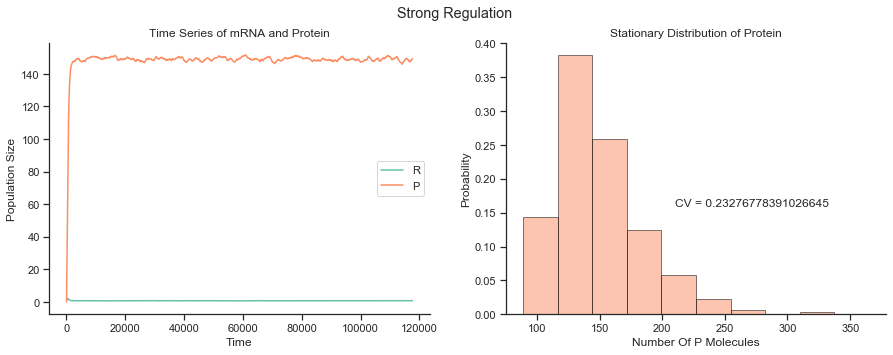

In [22]:
eq_P_counts = [item[-1] for item in P_counts]

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(np.mean(time_counts, axis=0), np.mean(R_counts, axis=0), label='R')
ax[0].plot(np.mean(time_counts, axis=0), np.mean(P_counts, axis=0), label='P')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Population Size')
ax[0].legend()
ax[0].set_title('Time Series of mRNA and Protein')
ax[1].hist(eq_P_counts, alpha=0.5, histtype = 'bar', fill=True, ec='black',
           weights=np.ones_like(eq_P_counts) / len(eq_P_counts), color='#fc8d62')
ax[1].text(210, 0.16, 'CV = {0}'.format(np.std(eq_P_counts)/np.mean(eq_P_counts)))
ax[1].set_xlabel('Number Of P Molecules')
ax[1].set_ylabel('Probability')
ax[1].set_title('Stationary Distribution of Protein')
fig.suptitle('Strong Regulation')
sns.despine()

(ii) Weak Regulation ($ K = 10000 $)

In [25]:
k_l = 0.001
k_p = 0.17
k_0 = 0.01 
gamma_p = 0.00028
gamma_r = 0.0083
n = 10
K = 10000
R = 0
P = 0
max_steps = 100000
num_sims = 1000
simulations = [autoregulation(k_l, k_p, k_0, gamma_p, gamma_r, n, K, R, P, max_steps)
               for i in range(num_sims)]
time_counts, R_counts, P_counts = zip(*simulations)
time_counts = np.asarray(time_counts)
R_counts = np.asarray(R_counts)
P_counts = np.asarray(P_counts)

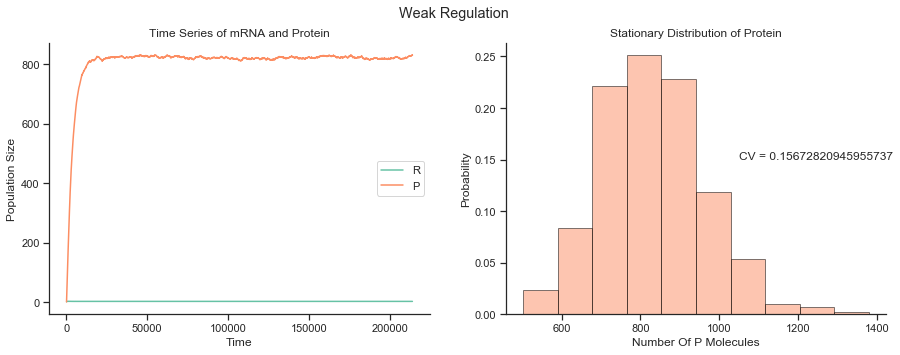

In [26]:
eq_P_counts = [item[-1] for item in P_counts]
#800, 0.16
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(np.mean(time_counts, axis=0), np.mean(R_counts, axis=0), label='R')
ax[0].plot(np.mean(time_counts, axis=0), np.mean(P_counts, axis=0), label='P')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Population Size')
ax[0].legend()
ax[0].set_title('Time Series of mRNA and Protein')
ax[1].hist(eq_P_counts, alpha=0.5, histtype = 'bar', fill=True, ec='black',
           weights=np.ones_like(eq_P_counts) / len(eq_P_counts), color='#fc8d62')
ax[1].text(1050, 0.15, 'CV = {0}'.format(np.std(eq_P_counts)/np.mean(eq_P_counts)))
ax[1].set_xlabel('Number Of P Molecules')
ax[1].set_ylabel('Probability')
ax[1].set_title('Stationary Distribution of Protein')
fig.suptitle('Weak Regulation')
sns.despine()